In [4]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os

### Carregando Dataset Novamente

In [ ]:
# Caminhos para as pastas de treino e teste
caminho_treino = os.path.join("..", "dataset", "train")
caminho_teste = os.path.join("..", "dataset", "test")

# Divisão de treino e teste
train_dir = caminho_treino
test_dir = caminho_teste

# Configurações do dataset
batch_size = 32
img_size = (128, 128)

# Carregar o dataset de treino
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size
)

# Carregar o dataset de teste
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size
)

# Determinar classes
nome_classes = train_dataset.class_names
print("Classes detectadas:", nome_classes)

# Otimização
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

Found 34714 files belonging to 21 classes.
Found 11548 files belonging to 21 classes.
Classes detectadas: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Y']


### Carregando Modelo

In [5]:
caminho_modelo= os.path.join("..", "model", "modelo_libras.h5")
model = load_model(caminho_modelo)

In [19]:
# Prever no conjunto de teste
y_true = []
y_pred = []

# Gerar previsões e rótulos reais
for images, labels in test_dataset:
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_true.extend(labels.numpy())

# Converter listas para arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Obter os nomes das classes
target_nomes = nome_classes  # Obtido anteriormente do dataset

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Função para exibir a matriz de confusão como gráfico de calor
def plot_confusion_matrix(cm, target_nomes, title='Matriz de Confusão', normalize=False):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        fmt = ".2f"
    else:
        fmt = "d"

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt=fmt, cmap="Blues", xticklabels=target_nomes, yticklabels=target_nomes)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━

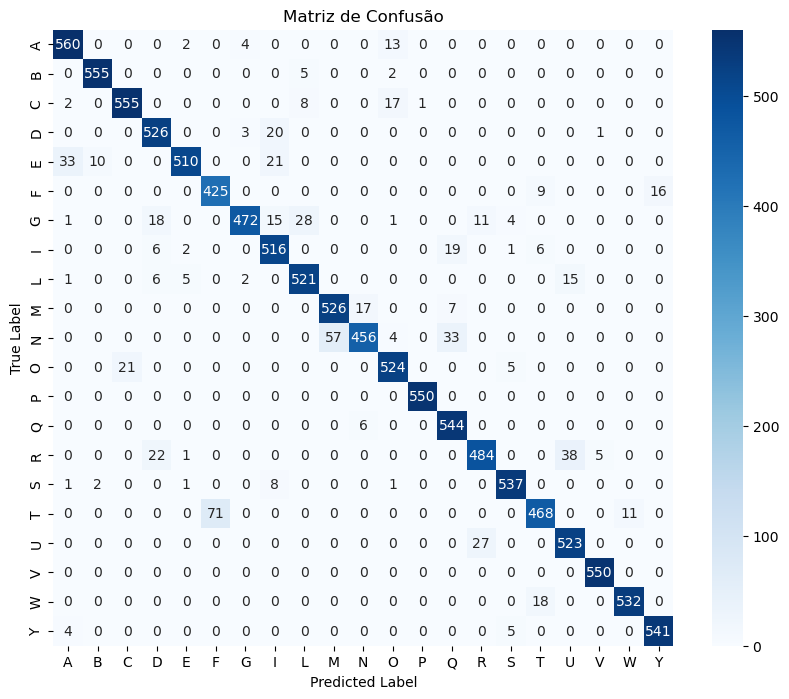

In [20]:
# Plot da matriz de confusão
plot_confusion_matrix(cm, target_nomes, normalize=False, title='Matriz de Confusão')

In [22]:
matriz = pd.DataFrame(classification_report(y_true, y_pred, target_names=nome_classes, output_dict=True)).transpose()
matriz

,precision,recall,f1-score,support
A,0.930233,0.967185,0.948349,579.000000
B,0.978836,0.987544,0.983171,562.000000
C,0.963542,0.951973,0.957722,583.000000
D,0.910035,0.956364,0.932624,550.000000
E,0.978887,0.888502,0.931507,574.000000
F,0.856855,0.944444,0.898520,450.000000
G,0.981289,0.858182,0.915616,550.000000
I,0.889655,0.938182,0.913274,550.000000
L,0.927046,0.947273,0.937050,550.000000
M,0.902230,0.956364,0.928508,550.000000
